In [308]:
## Exploratory data analysis with real world dataset - World Energy Consumption data
# data source: https://www.kaggle.com/pralabhpoudel/world-energy-consumption

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import os
import plotly.express as px
import re
import opendatasets as od
pd.options.display.max_rows = 2000

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [309]:
# download_url = "https://www.kaggle.com/pralabhpoudel/world-energy-consumption"
# od.download(download_url)

In [495]:
df = pd.read_csv(r'world-energy-consumption/World Energy Consumption.csv',  encoding="utf-8")

df.count().sort_values()
df = df[["country", "year",
        "coal_consumption", "gas_consumption", "biofuel_consumption",
        "hydro_consumption", "nuclear_consumption", "oil_consumption",
        "other_renewable_consumption", "solar_consumption", "wind_consumption",
         "fossil_fuel_consumption", "renewables_consumption","gdp","population"]]

df = df.rename(columns=lambda x: re.sub("^([\w\-]+)", x.capitalize(), x))
df = df.rename(columns=lambda x: re.sub("_"," ", x))
df = df.rename(columns={"Gdp": "GDP"})

null_perc = df.isnull().sum()/len(df)*100

# print(null_perc.sort_values(ascending = False).tail(50))


df.describe()

,Year,Coal consumption,Gas consumption,Biofuel consumption,Hydro consumption,Nuclear consumption,Oil consumption,Other renewable consumption,Solar consumption,Wind consumption,Fossil fuel consumption,Renewables consumption,GDP,Population
count,17432.00,5170.00,5170.00,5626.00,4290.00,4290.00,5184.00,4290.00,4290.00,4290.00,4284.00,4290.00,10456.00,15676.00
mean,1973.09,894.62,665.60,5.83,195.80,160.18,1238.02,16.45,4.33,15.08,2737.59,239.31,541783311486.13,62862803.09
std,34.33,3800.36,2606.56,48.93,807.98,699.04,4534.64,83.18,48.55,126.67,11071.91,1042.08,4083841977485.70,379389949.53
min,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.85,0.00,196308000.00,2000.00
25%,1946.00,2.37,7.86,0.00,1.38,0.00,67.64,0.00,0.00,0.00,121.41,2.37,12538039808.00,1804069.00
50%,1983.00,31.79,51.69,0.00,13.58,0.00,154.23,0.13,0.00,0.00,296.33,17.78,42816487424.00,6523860.50
75%,2002.00,200.21,259.31,0.00,73.78,29.72,512.24,4.14,0.01,0.14,1068.12,87.52,175000000000.00,20111250.00
max,2020.00,44993.47,39292.47,1101.95,10455.13,7493.28,53619.93,1614.03,1793.00,3540.05,136761.61,18504.15,107000000000000.00,7713467904.00


In [496]:
# Percentage of null values in each column
null_perc = df.isnull().sum()/len(df)*100
print("Null percentage of each column:")
print(null_perc.sort_values(ascending = False).head(50))
# Dropping each row with null values
df = df.dropna(how='any',axis=0)
df.sort_values(by=["Coal consumption"])

Null percentage of each column:
Fossil fuel consumption       75.42
Hydro consumption             75.39
Nuclear consumption           75.39
Other renewable consumption   75.39
Solar consumption             75.39
Wind consumption              75.39
Renewables consumption        75.39
Coal consumption              70.34
Gas consumption               70.34
Oil consumption               70.26
Biofuel consumption           67.73
GDP                           40.02
Population                    10.07
Country                        0.00
Year                           0.00
dtype: float64


,Country,Year,Coal consumption,Gas consumption,Biofuel consumption,Hydro consumption,Nuclear consumption,Oil consumption,Other renewable consumption,Solar consumption,Wind consumption,Fossil fuel consumption,Renewables consumption,GDP,Population
4852,Ecuador,2011,0.00,5.61,0.00,28.85,0.00,127.27,0.72,0.00,0.01,132.88,29.58,150000000000.00,15244000.00
13100,Qatar,2014,0.00,385.36,0.00,0.00,0.00,124.27,0.29,0.02,0.00,509.63,0.31,282000000000.00,2459000.00
13101,Qatar,2015,0.00,424.15,0.00,0.00,0.00,144.25,0.29,0.02,0.00,568.40,0.31,292000000000.00,2566000.00
13102,Qatar,2016,0.00,402.09,0.00,0.00,0.00,151.88,0.29,0.02,0.00,553.98,0.31,300000000000.00,2654000.00
13708,Saudi Arabia,1965,0.00,6.00,0.00,0.00,0.00,229.14,0.00,0.00,0.00,235.14,0.00,60349583360.00,4844000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17019,World,2015,43844.17,34780.12,907.40,9827.17,6516.07,50891.98,1361.71,649.74,2103.67,129516.27,14849.69,105000000000000.00,7379796992.00
17015,World,2011,44018.08,32370.99,745.15,9072.90,6874.33,48549.97,1033.31,168.77,1141.84,124939.05,12161.97,94000000000000.00,7041193984.00
17016,World,2012,44185.35,33220.03,764.71,9400.81,6364.20,49156.72,1109.54,259.66,1367.35,126562.10,12902.07,96600000000000.00,7125828096.00
17018,World,2014,44954.43,33994.28,875.84,9910.34,6466.97,50013.65,1274.78,503.53,1797.90,128962.37,14362.39,102000000000000.00,7295290880.00


In [497]:
# 1965 is starting year for most of countries in the dataset but for some of them there is no data,
# let's fill the data so that all countries have stats since 1970
df = df[df["Year"]>=1970]
df = df[df.Country != "World"]

starting_year = 1970
countries_with_1970 = set()
all_countries = set(x for x in df["Country"].unique())

for country in df["Country"].unique():
    if ((df['Country'] == country) & (df['Year'] == starting_year)).any():
        countries_with_1970.add(country)
countries_without_1970 = all_countries-countries_with_1970


for country in countries_without_1970:
    year = df["Year"][df["Country"]==country].min()
    row = df.loc[(df["Country"]==country) & (df["Year"]==year)]
    while year-1 >= 1970:
        row["Year"] = year-1
        df = df.append(row, ignore_index = True)
        year -= 1

df = df.sort_values(by=['Country', 'Year'])

C:\Users\wierc\AppData\Local\Temp\ipykernel_2828\263079292.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



<AxesSubplot:>

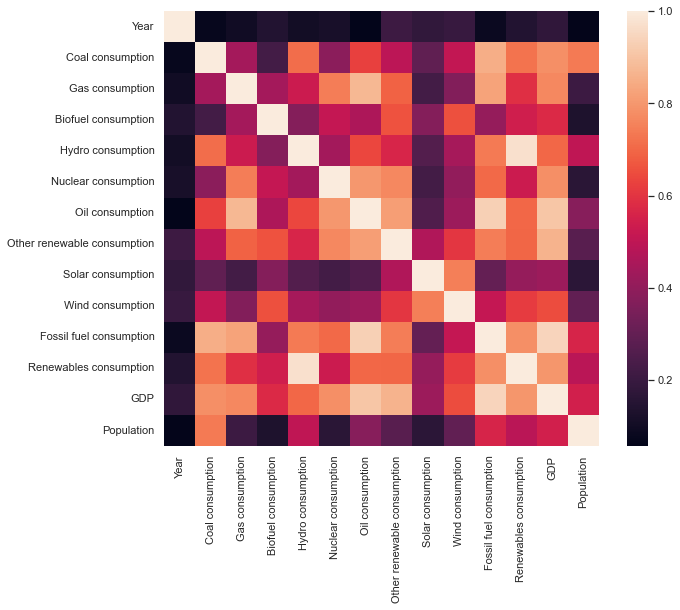

In [313]:
# Correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corrmat, square=True)

In [498]:
df_country_gdp = df[['Country','GDP', 'Population']].loc[df["Year"] == 2016].copy()
# df_country_gdp = df_country_gdp.groupby('Country').mean()
df_country_gdp = df_country_gdp.sort_values(by="GDP")

In [499]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# sns.histplot(data=df_country_gdp["gdp"], log_scale=True, fill=False, bins=30)
# sns.histplot(data=df_country_gdp["Population"], log_scale=True, fill=False, bins=30)
gdp_groupped = pd.cut(df.GDP, bins = [0, 10**11, 10**12, 10**13, 10**14],
                      labels=["0 - 0.1 bln $", "0.1 - 1 bln $", "1 - 10 bln $", "10 - 100 bln $"], ordered=True)
population_groupped = pd.cut(df.Population, bins = [0, 10**6, 10**7, 10**8, 10**9, 10**10],
                      labels=["0 - 1 000 000", "1 000 000 - 10 000 000",
                              "10 000 000 - 100 000 000", "100 000 000 - 1 000 000 000",
                              "1 000 000 000 - 10 000 000 000"], ordered=True)
years_groupped = pd.cut(df.Year, bins = [1969, 1980, 1990, 2000, 2010, 2020],
                      labels=[ "1970 - 1980", "1980 - 1990", "1990 - 2000",
                              "2000 - 2010", "2010 - 2020"], ordered=True)

df.insert(len(df.columns),"GDP groupped", gdp_groupped)
df.insert(len(df.columns),"Population groupped", population_groupped)
df.insert(len(df.columns),"Decade", years_groupped)

# to group countries by their GDP and population in 2016
for country in df["Country"].unique():
    df.loc[df.Country == country, "GDP groupped"] = \
    df["GDP groupped"].loc[(df["Country"]== country) & (df["Year"] == 2016)].item()

    df.loc[df.Country == country, "Population groupped"] = \
    df["Population groupped"].loc[(df["Country"]== country) & (df["Year"] == 2016)].item()

# df.population_groupped = pd.Categorical(df["Population groupped"].values, categories=["0 - 1 000 000",
#                               "1 000 000 - 10 000 000", "10 000 000 - 100 000 000",
#                               "100 000 000 - 1 000 000 000", "1 000 000 000 - 10 000 000 000"], ordered=True)
#
# df.gdp_groupped = pd.Categorical(df["GDP groupped"].values,
#                                            categories=["0 - 0.1 bln $", "0.1 - 1 bln $", "1 - 10 bln $",
#                                                        "10 - 100 bln $"], ordered=True)


In [316]:
df["Population groupped"].loc[df["Year"] == 2016].value_counts(sort=False).plot(kind="bar",
                                                                                title="Population distribution")

c:\users\wierc\desktop\eda\venv\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 432x288 with 0 Axes>

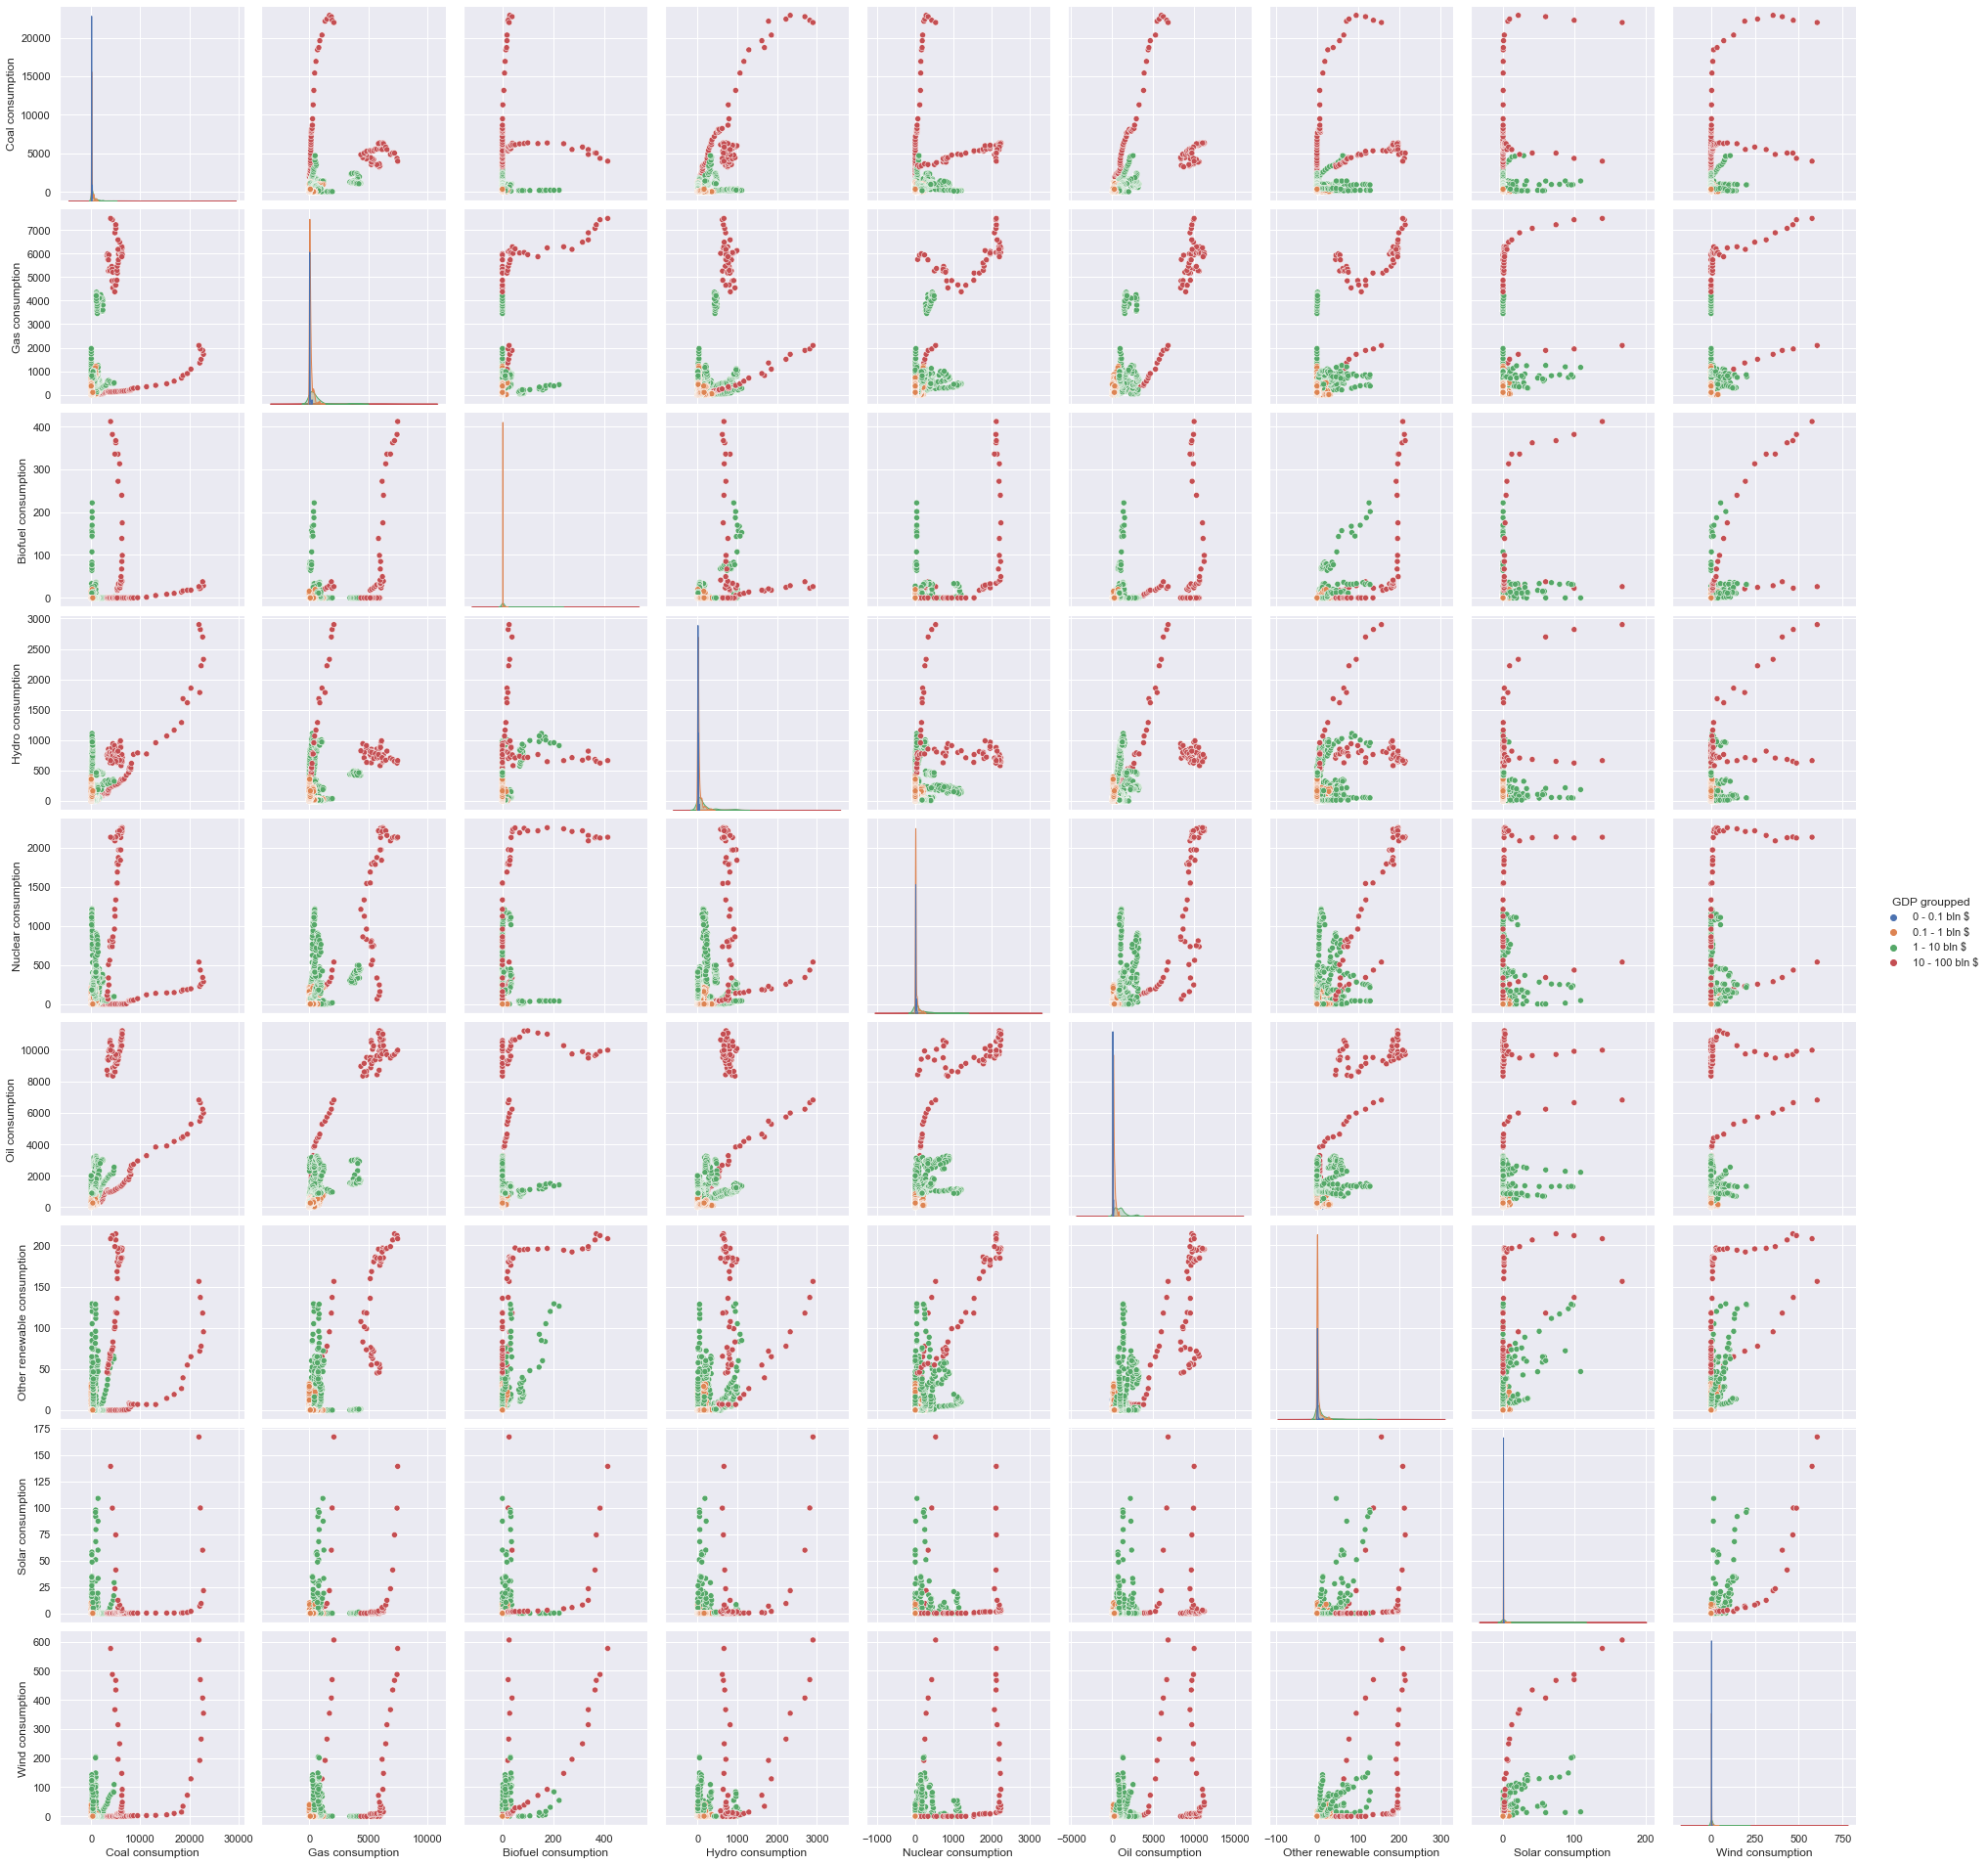

c:\users\wierc\desktop\eda\venv\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 432x288 with 0 Axes>

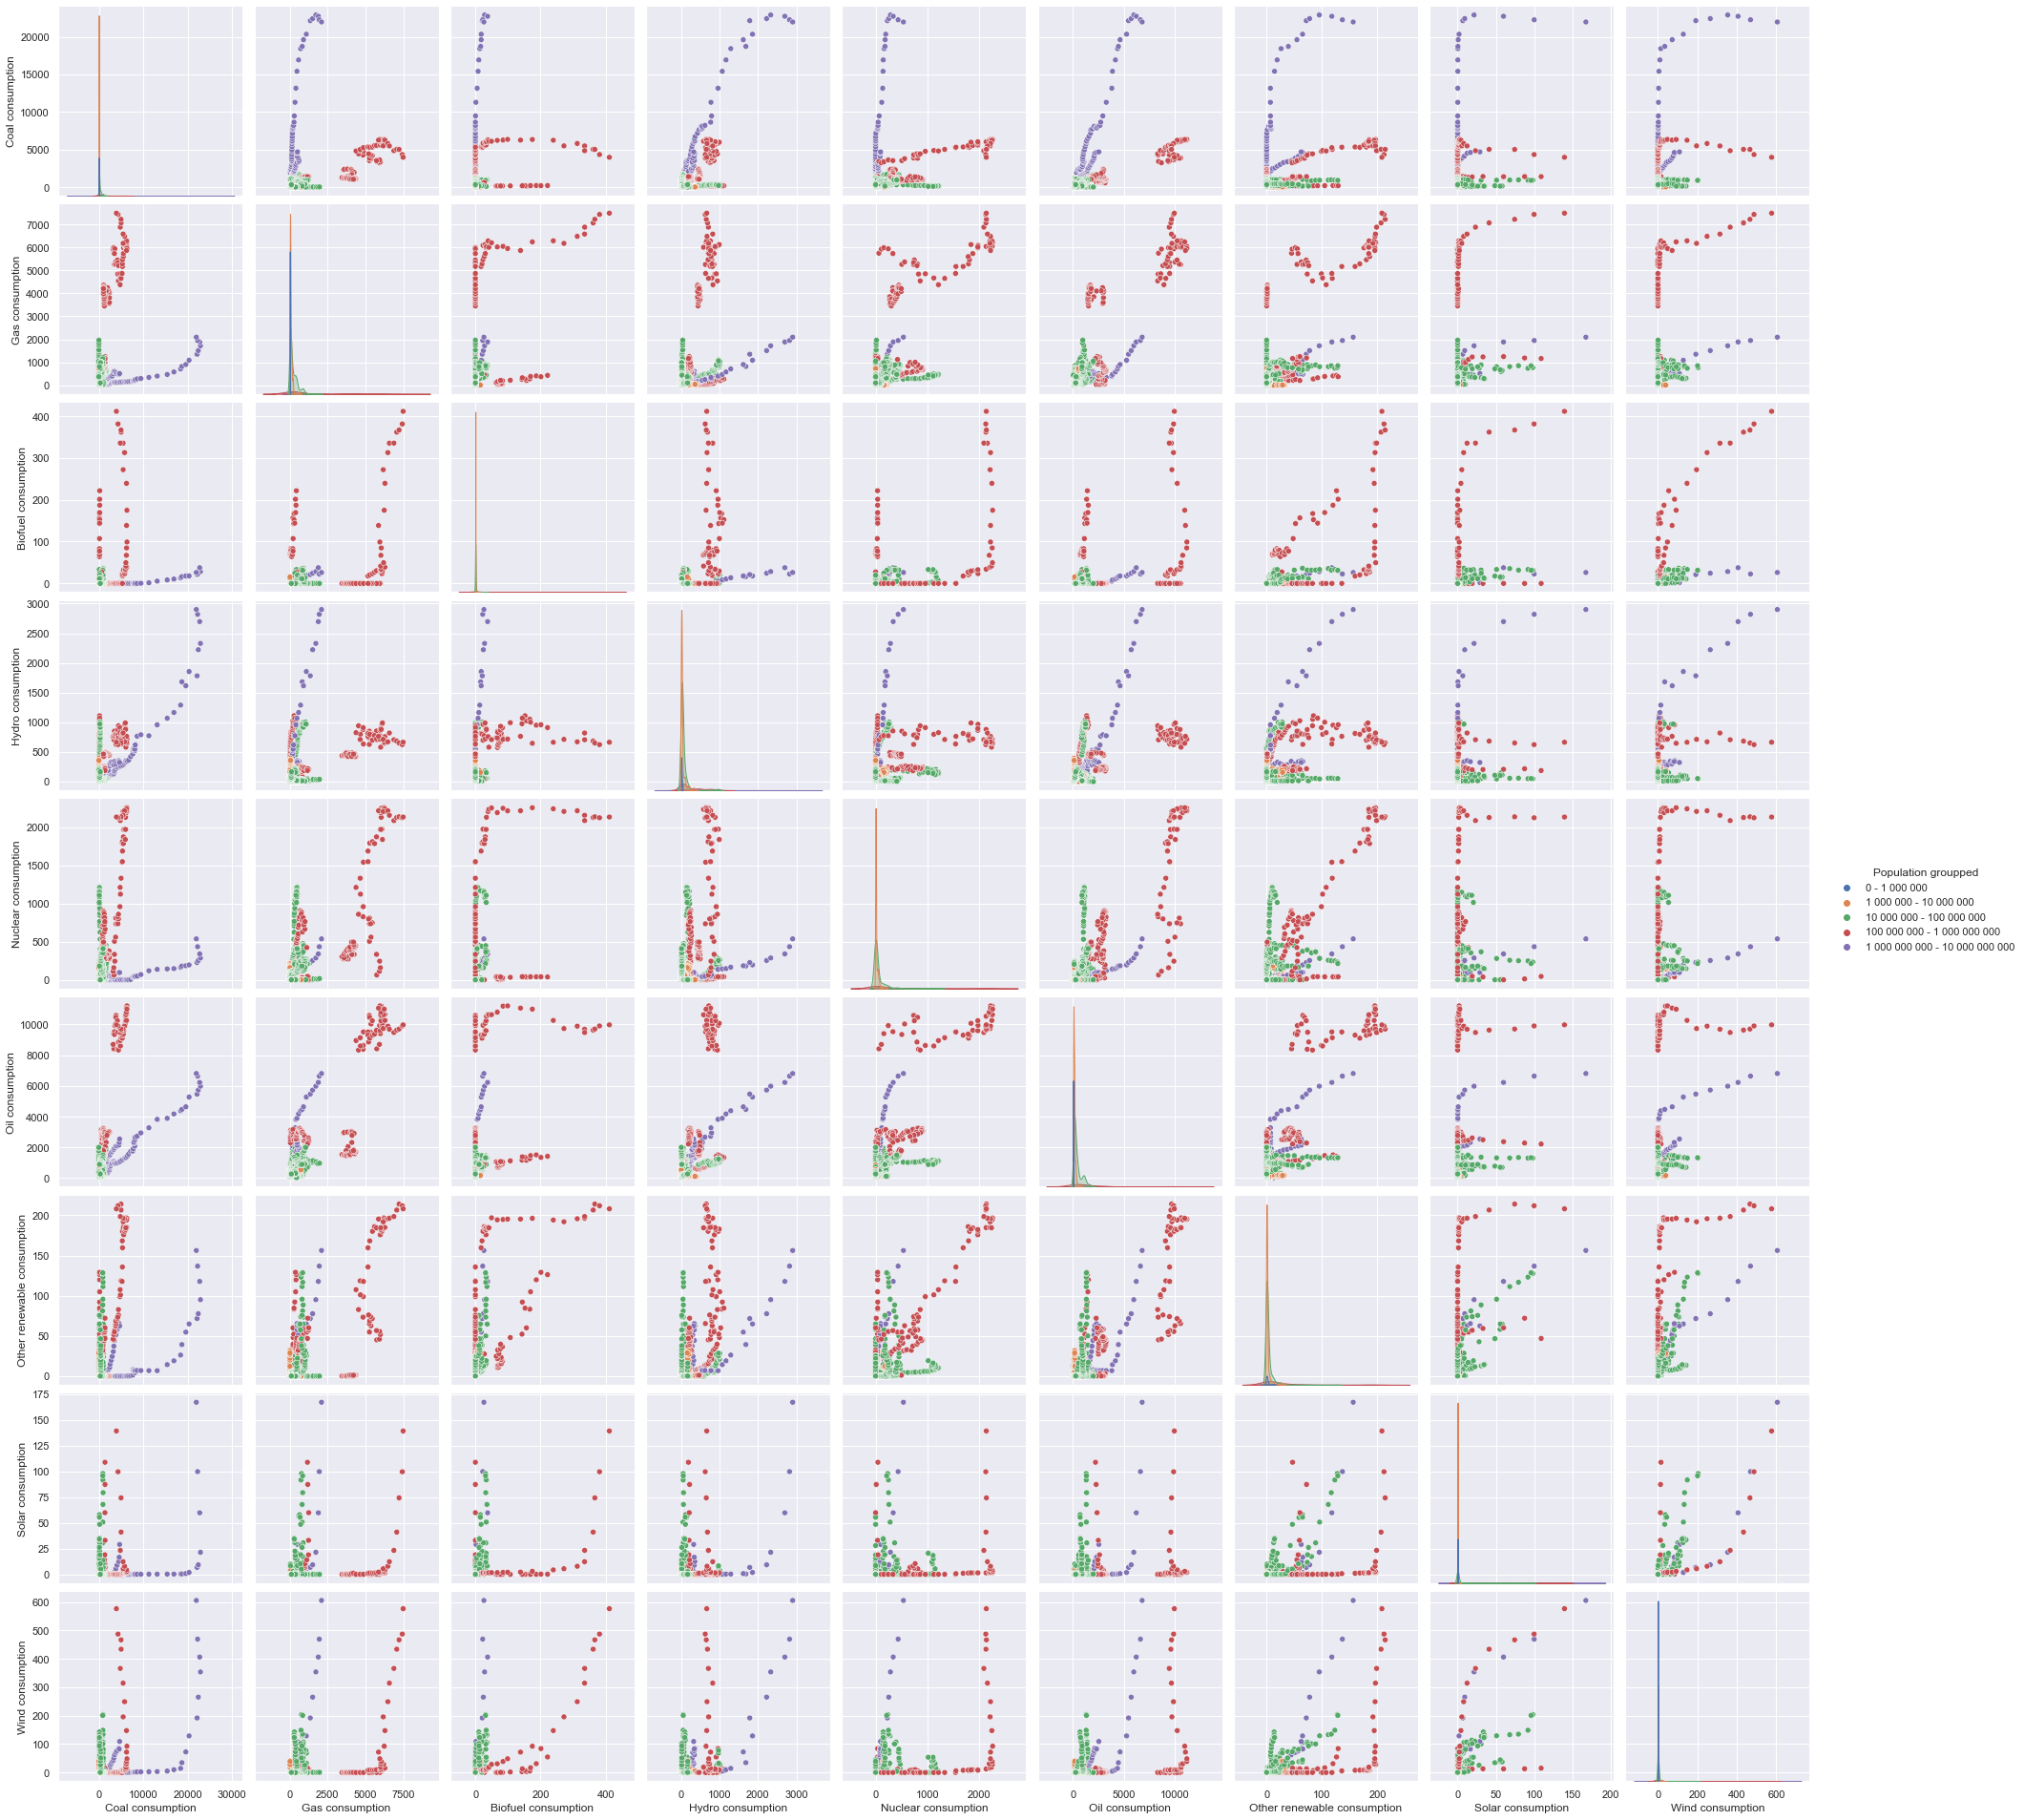

c:\users\wierc\desktop\eda\venv\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



<Figure size 432x288 with 0 Axes>

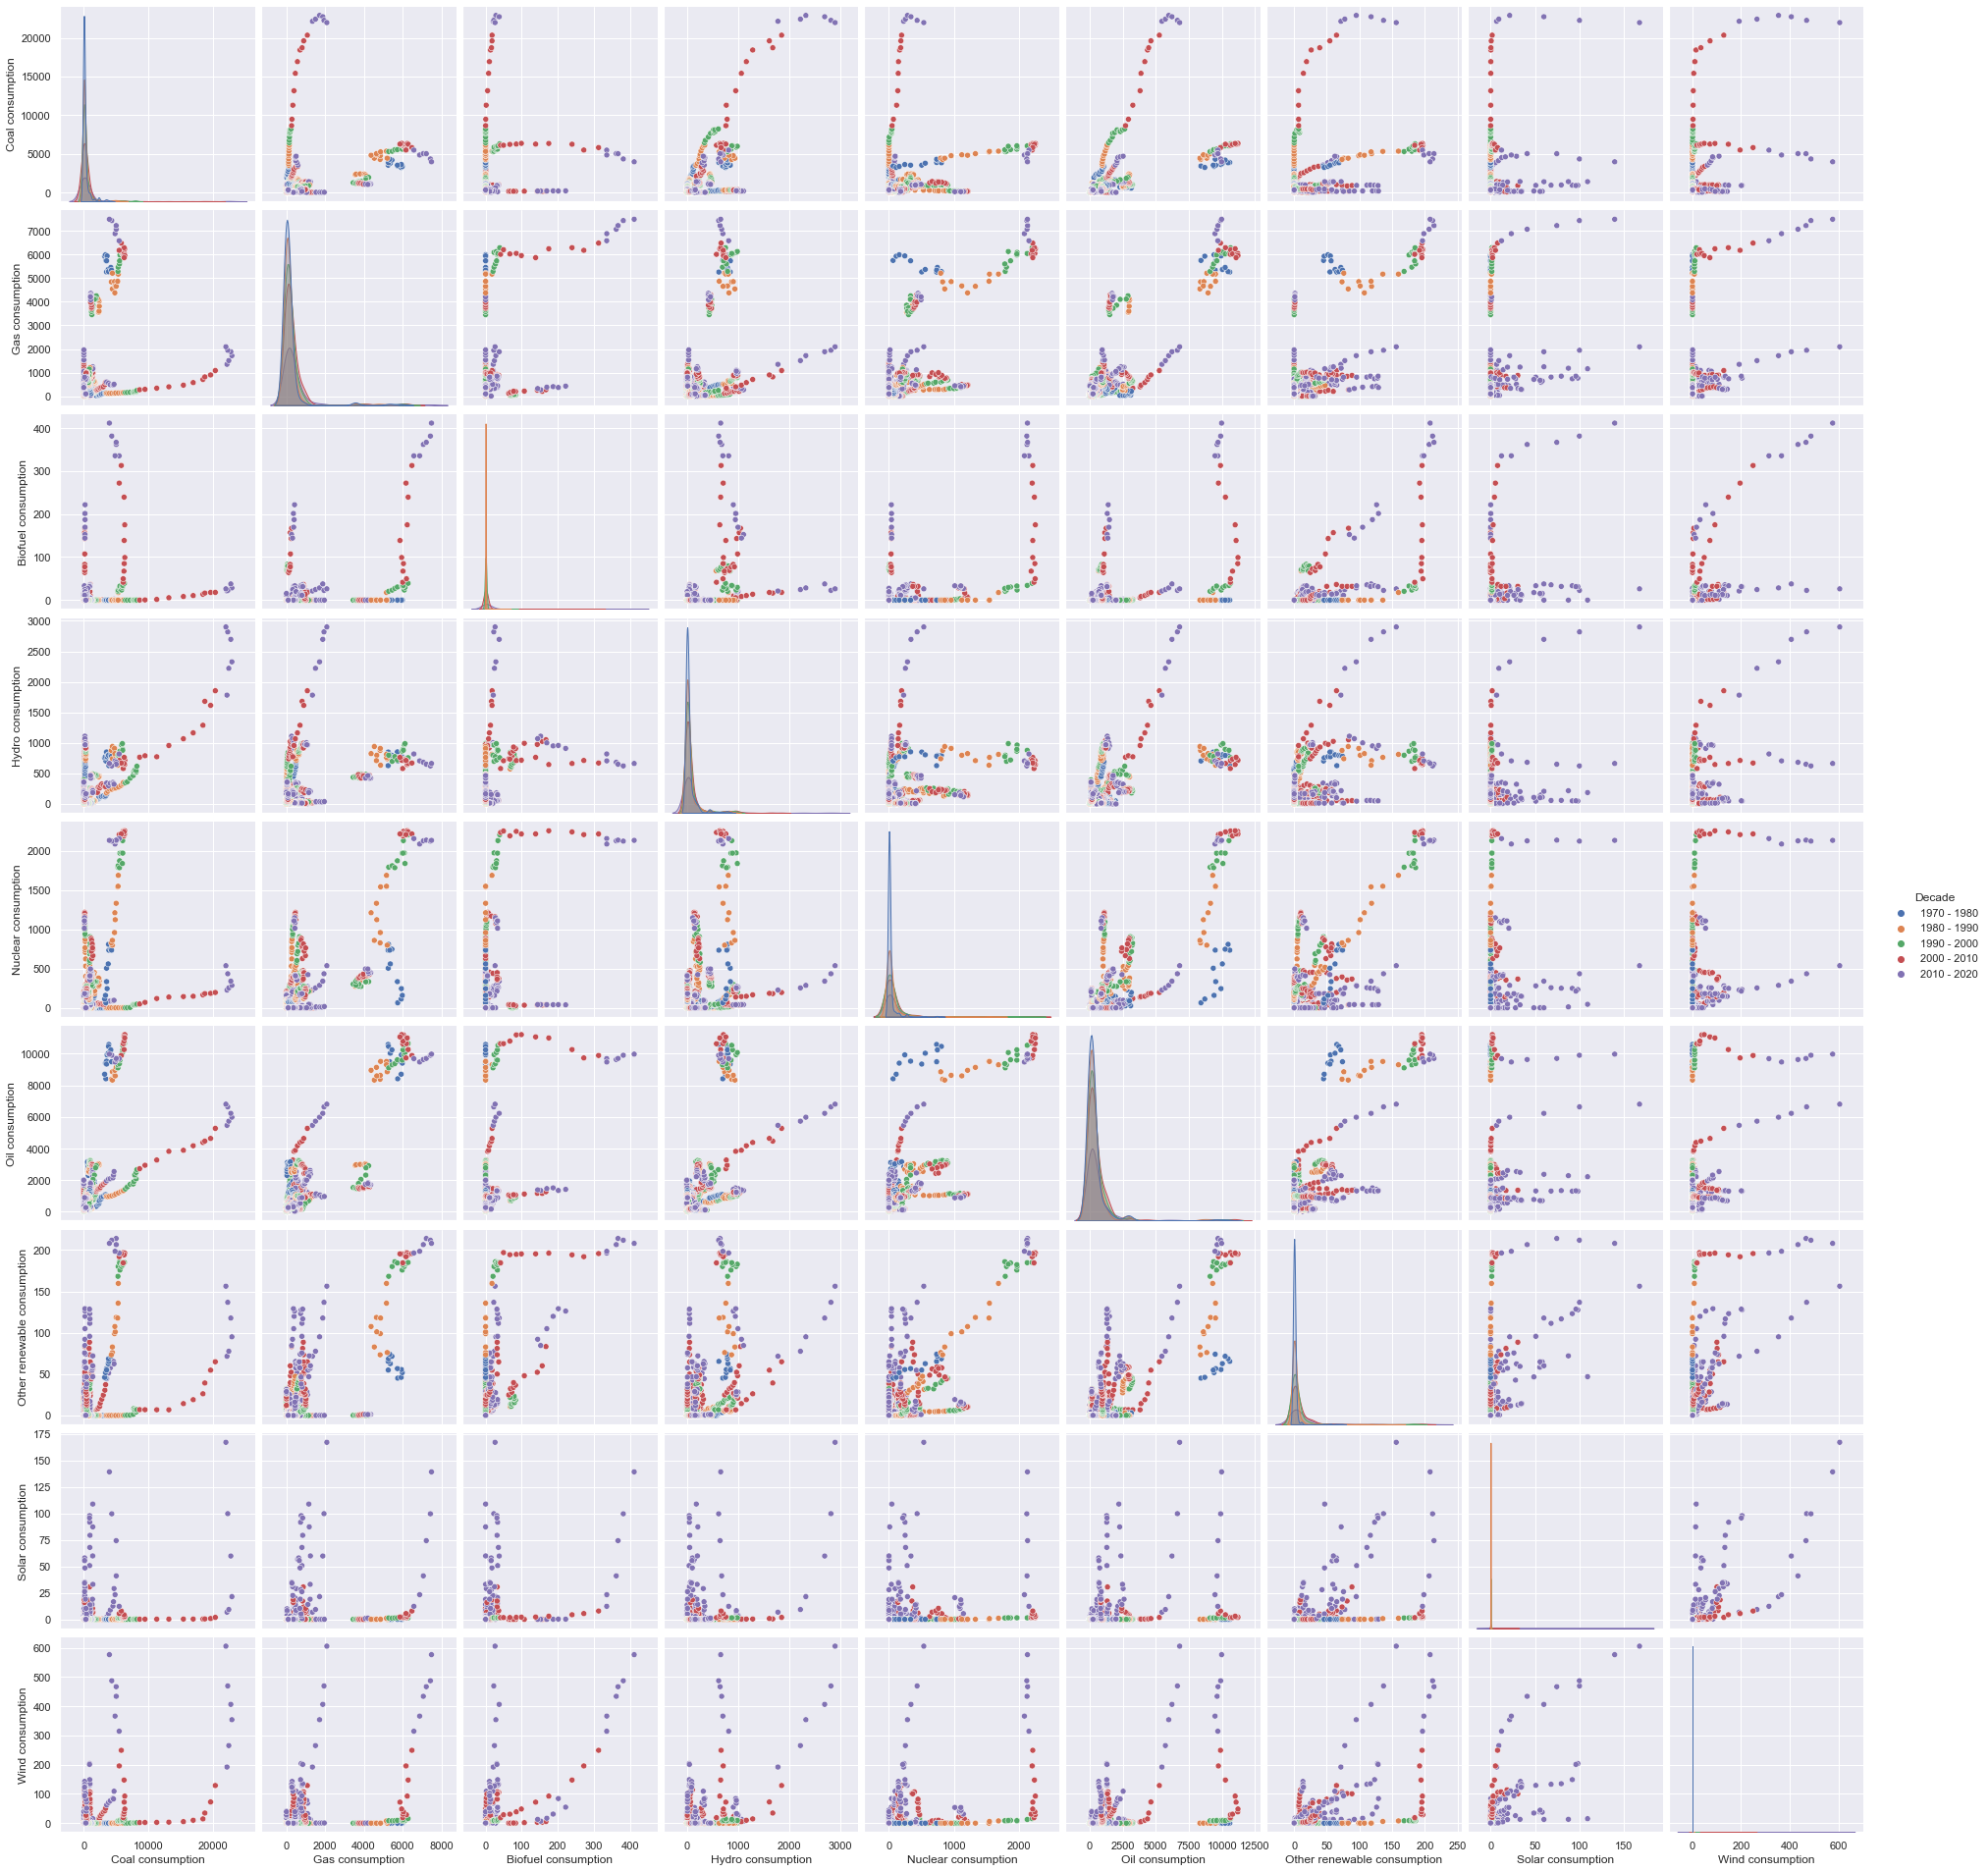

In [317]:
cat_col = ['GDP groupped', 'Population groupped', 'Decade']

for col in cat_col:
    sns.set()
    cols = [ "Coal consumption", "Gas consumption", "Biofuel consumption",
        "Hydro consumption", "Nuclear consumption", "Oil consumption",
        "Other renewable consumption",
        "Solar consumption", "Wind consumption"]
    df_sns = df[cat_col+cols]
    plt.figure()
    sns.pairplot(df_sns, size = 3.0, hue=col)
    plt.show()

In [318]:
df = df.sort_values(by="Population groupped")
energy_source = "Coal consumption"
decade = "2000 - 2010"
df_decade = df.loc[df["Decade"] == decade]
for value in df_decade["Population groupped"].unique():
    fig = px.box(df_decade.loc[df_decade['Population groupped'] == value],  x="Population groupped",
                 y=energy_source, color='GDP groupped',
             title="Distribution of "+energy_source.lower()+" by population and GDP in "+decade)
    fig.show()

In [530]:
energy_type_consumption = "Hydro consumption"
starting_year = 1990
df_growth = df.iloc[0:0]
df_growth = df_growth.drop(columns=['Year', 'Decade'])
for country in df["Country"].unique():
    first_row = df.loc[(df["Country"]== country) & (df["Year"] == 2016)]
    population_groupped = first_row["Population groupped"].item()
    gdp_groupped = first_row["GDP groupped"].item()
    first_row = first_row.drop(columns=['Country', 'Population groupped',
                                        'GDP groupped', 'Decade', 'Year'])
    first_row.reset_index(inplace=True)

    second_row = df.loc[(df['Country'] == country) & (df['Year'] == starting_year)]
    second_row = second_row.drop(columns=['Country', 'Population groupped',
                                          'GDP groupped', 'Decade', 'Year'])
    second_row.reset_index(inplace=True)
    row = (first_row - second_row)/second_row

    row["Country"] = country
    row["Population groupped"] = population_groupped
    row["GDP groupped"] = gdp_groupped

    df_growth = pd.concat([df_growth, row], ignore_index = True)


df_growth = df_growth.drop(columns=['index'])

df_growth = df_growth.sort_values(by=["GDP groupped", energy_type_consumption])
fig = px.box(df_growth, x="GDP groupped", y=energy_type_consumption, points="all",
             title=energy_type_consumption+" percentrage growth since "+str(starting_year)+" by GDP",
             color_discrete_sequence=['#007fff'])
fig.update_yaxes(tickformat="%")
fig.show()

In [537]:
# darkyellow =['#9b870c']
# df_growth

In [320]:
df_population = df[["Population groupped","Coal consumption", "Gas consumption",
                    "Biofuel consumption", "Hydro consumption", "Nuclear consumption",
                    "Oil consumption", "Other renewable consumption", "Solar consumption",
                    "Wind consumption"]].copy()
df_population = df_population.groupby('Population groupped').sum()
df_population.sort_values(by="Population groupped")

for i in range(len(df_population)) :
    ef = pd.DataFrame({'labels': df_population.columns,'values': df_population.iloc[i]})
    ef.iplot(kind='pie',labels='labels',values='values',
         title='Energy consumption for countries: '
         +str(df_population.index[i])+ " population", hole = 0.5)

In [321]:
decade = '2000 - 2010'

temp = df.iloc[0:0]
temp = temp.drop(columns=['Decade', 'Year'])

starting_year = int(decade[:4])
ending_year = int(decade[7:])

for country in df["Country"].unique():
    first_row = df.loc[(df['Country'] == country) & (df['Year'] == ending_year)]
    population_groupped = first_row["Population groupped"].item()
    gdp_groupped = first_row["GDP groupped"].item()
    first_row = first_row.drop(columns=['Country', 'Population groupped',
                                        'GDP groupped', 'Decade', 'Year'])
    first_row.reset_index(inplace=True)

    second_row = df.loc[(df['Country'] == country) & (df['Year'] == starting_year)]
    second_row = second_row.drop(columns=['Country', 'Population groupped',
                                          'GDP groupped', 'Decade', 'Year'])
    second_row.reset_index(inplace=True)

    row = first_row - second_row
    row["Country"] = country
    row["Population groupped"] = population_groupped
    row["GDP groupped"] = gdp_groupped

    temp = pd.concat([temp, row], ignore_index = True)

pd.options.plotting.backend = "plotly"

In [535]:
df = df.sort_values(by=['Country', 'Year'])

energy_type_consumption = "Renewables consumption"
for gdp in sorted(df["GDP groupped"].unique()):
    fig = px.line(df.loc[(df["GDP groupped"] == gdp) & (df["Year"] >= 1985)],
                  x="Year", y=energy_type_consumption, color='Country',
                  title=energy_type_consumption+" in countries with GDP "+gdp)
    fig.show()



In [536]:
color_discrete_sequence = ['#48494b']*len(temp)
energy_type_consumption = "Oil consumption"
for item in temp["GDP groupped"].unique():
    fig = px.bar(temp[(temp["GDP groupped"] == item)].sort_values("Oil consumption", ascending=False),
                 x='Country', y=energy_type_consumption,
                 title=energy_type_consumption+" growth in "+decade+ " for GDP: "+item,
                 labels={'oil_consumption':'Growth in TWh', 'country': 'Country'},
                 color_discrete_sequence=color_discrete_sequence,width=900, height=600
    )
    fig.show()

In [ ]:
## Linear regression

import numpy as np
from sklearn.linear_model import LinearRegression

countries = ["Poland", "Switzerland", "Egypt", "Russia", "USA", "China", "India"]
country = countries[0]
reg = LinearRegression().fit(df["Year"].loc[(df["Country"] == country)],
                             df["Renewables consumption"].loc[(df["Country"] == country)])


# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn import datasets, linear_model
# from sklearn.metrics import mean_squared_error, r2_score
#
# # Load the diabetes dataset
# diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
#
# # Use only one feature
# diabetes_X = diabetes_X[:, np.newaxis, 2]
#
# # Split the data into training/testing sets
# diabetes_X_train = diabetes_X[:-20]
# diabetes_X_test = diabetes_X[-20:]
#
# # Split the targets into training/testing sets
# diabetes_y_train = diabetes_y[:-20]
# diabetes_y_test = diabetes_y[-20:]
#
# # Create linear regression object
# regr = linear_model.LinearRegression()
#
# # Train the model using the training sets
# regr.fit(diabetes_X_train, diabetes_y_train)
#
# # Make predictions using the testing set
# diabetes_y_pred = regr.predict(diabetes_X_test)
#
# # The coefficients
# print("Coefficients: \n", regr.coef_)
# # The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# # The coefficient of determination: 1 is perfect prediction
# print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))
#
# # Plot outputs
# plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
# plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)
#
# plt.xticks(())
# plt.yticks(())
#
# plt.show()